<a href="https://colab.research.google.com/github/malisabihaoglu/GlobalAIHub/blob/main/MedicalCostAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ***DATA ANALYSIS***

In [93]:
#Projenin amacını belirleyen veri setimizi yükleyelim.
insurance = pd.read_csv("insurance.csv")

#Temel veri setini bozmamak için insurance dosyasını kopyalayalım.
df=insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [94]:
#Veri setinde boş değerlerin varlığını kontrol edelim.
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [95]:
#Veri türlerini, eksik verileri ve bellek kullanımını görüntüleyelim.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [96]:
#Temel istatistikleri görüntüleyelim ve sayısal değişkenlerin dağılımlarını anlayalım.
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [97]:
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [99]:
insurance['charges'].mean()

13270.422265141257

In [100]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [101]:
#İstatistikleri görüntüleyelim.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [102]:
df.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


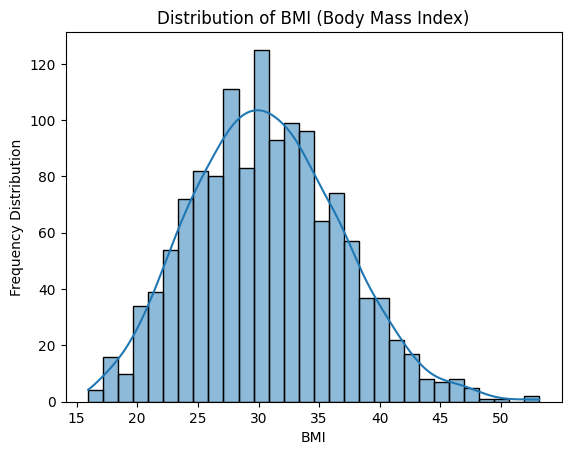

In [103]:
#BMI (Vücut Kitle İndeksi) dağılımını inceleyelim
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('Distribution of BMI (Body Mass Index)')
plt.xlabel('BMI')
plt.ylabel('Frequency Distribution')
plt.show()

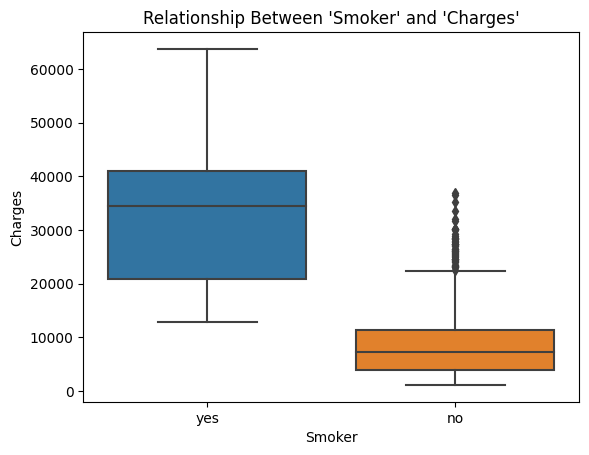

In [104]:
#Sigara içme durumu ile maliyet-harcama arasındaki ilişkiyi inceler
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Relationship Between 'Smoker' and 'Charges'")
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

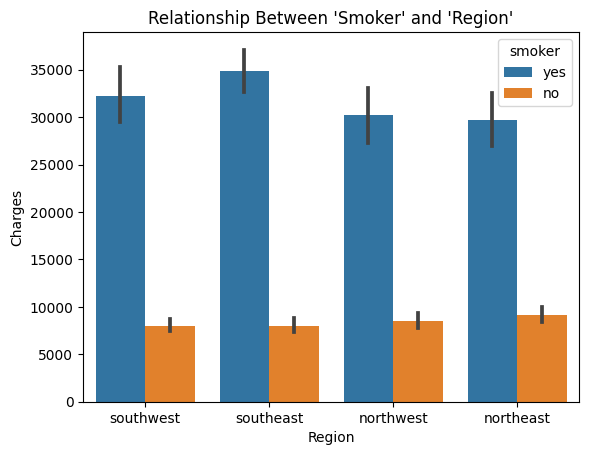

In [105]:
#Bölgelere göre sigara içme durumunu inceler
sns.barplot(x='region', y='charges', hue='smoker', data=df)
plt.title("Relationship Between 'Smoker' and 'Region'")
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

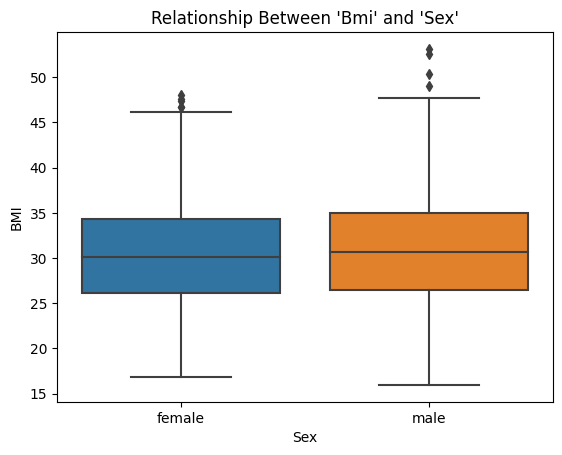

In [106]:
#Vücut kitle indeksi ile cinsiyet arasındaki ilişkiyi inceler
sns.boxplot(x='sex', y='bmi', data=df)
plt.title("Relationship Between 'Bmi' and 'Sex'")
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

In [107]:
#Bölgelere göre çocuk sayılarını sıralayalım
region_children_count = df.groupby("region")["children"].sum()
region_children_count

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

In [108]:
#En çok çocuk olan bölgeyi bulalım.
region_most_children, region_most_children_value

('southeast', 382)

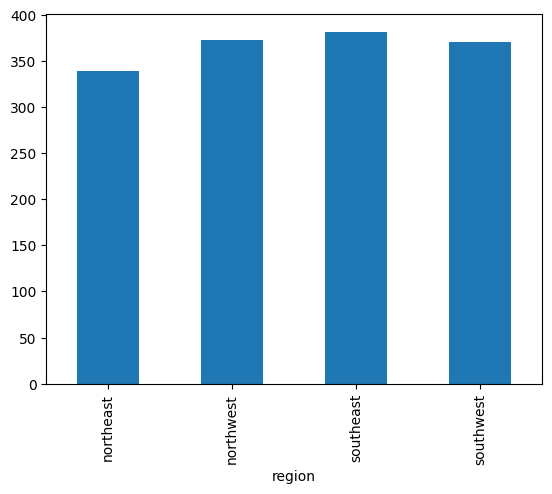

In [109]:
#Bölgelere göre çocuk sayılarını grafik üzerinde gösterelim.
region_children_count.plot.bar();

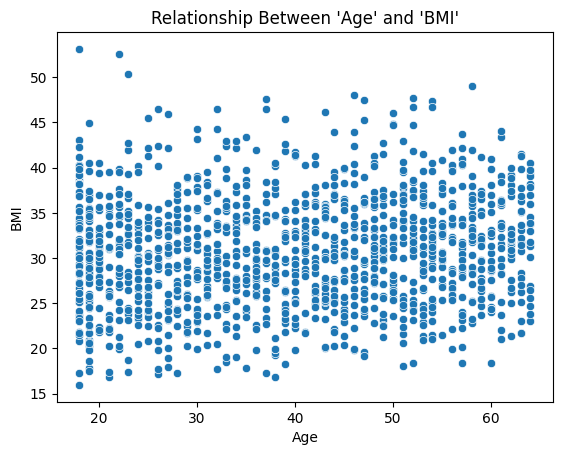

In [110]:
#Yaşlara göre vücut kitle indeksi arasındaki ilişkiyi gösterir
sns.scatterplot(x='age', y='bmi', data=df)
plt.title("Relationship Between 'Age' and 'BMI'")
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

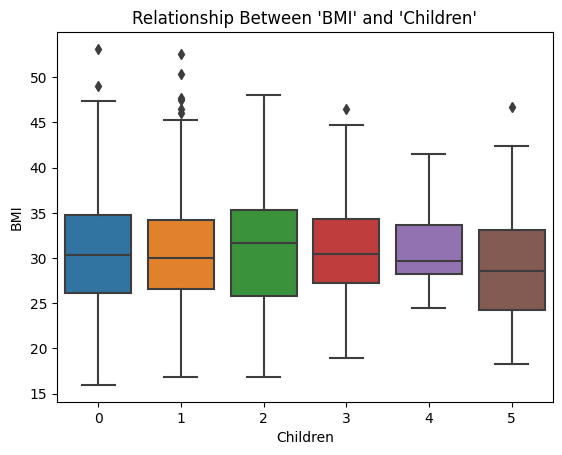

In [111]:
#Vücut kitle indeksinin çocuklara göre ilişkisini gösterir
sns.boxplot(x='children', y='bmi', data=df)
plt.title("Relationship Between 'BMI' and 'Children'")
plt.xlabel('Children')
plt.ylabel('BMI')
plt.show()

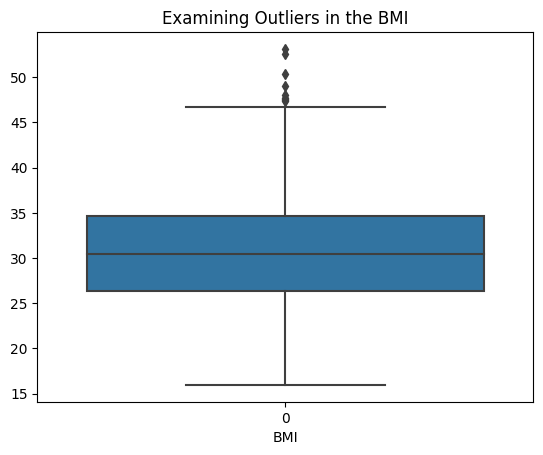

In [112]:
# BMI değişkenindeki aykırı değeri gözden geçirir
sns.boxplot(df['bmi'])
plt.title('Examining Outliers in the BMI')
plt.xlabel('BMI')
plt.show()

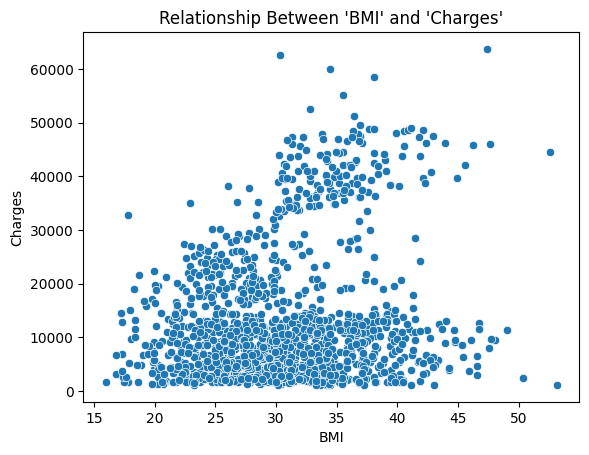

In [113]:
#Vücut kitle indeksi ile maliyetler arasındaki ilişkiyi gösterir
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title("Relationship Between 'BMI' and 'Charges'")
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

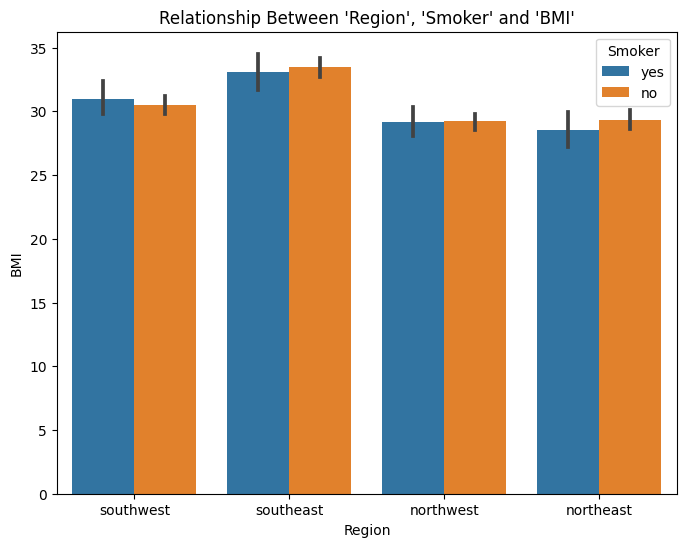

In [114]:
#Bölge, vücut kitle indeksi ve sigara içme durumunu gösterir.
plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='bmi', hue='smoker', data=df)
plt.title("Relationship Between 'Region', 'Smoker' and 'BMI'")
plt.xlabel('Region')
plt.ylabel('BMI')
plt.legend(title='Smoker')
plt.show()

# ***DATA PREPROCESSING***

In [24]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Object tipindeli verileri LabelEncoder ile Integer'e dönüştürelim.
label_encoder = preprocessing.LabelEncoder()

df["sex"] = label_encoder.fit_transform(df["sex"])
df["smoker"] = label_encoder.fit_transform(df["smoker"])
df["region"] = label_encoder.fit_transform(df["region"])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [26]:
#Parametreleri ve sonuçları birbirinden ayıralım.
y = df["charges"]
X = df.drop(["charges"], axis=1)

In [27]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [28]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [29]:
#Train ve test bölümlerini oluşturalım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [77]:
#Özelliklerin farklı büyüklüklerde olmasını engellemek için verilerimizi ölçeklendirelim.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ***MODEL SELECTION***

In [78]:
# Model Seçimi
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV

In [79]:
# Farklı regresyon modellerini seçelim
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Support Vector Machine", SVR())
]

In [80]:
# Seçilen modellerin performansını değerlendirelim
for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name} RMSE: {np.mean(rmse_scores):.4f} (std: {np.std(rmse_scores):.4f})")

Linear Regression RMSE: 6137.6230 (std: 401.4664)
Decision Tree RMSE: 6600.6151 (std: 679.1173)
Random Forest RMSE: 4933.3393 (std: 530.1849)
Gradient Boosting RMSE: 4708.6883 (std: 588.1958)
Support Vector Machine RMSE: 12550.9284 (std: 648.8371)


In [81]:
# En iyi performans veren modeli seçer
best_model = None
best_rmse = float('inf')

for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    avg_rmse = np.mean(rmse_scores)

    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_model = model
        best_model_name = name

print(f"En iyi performans gösteren model: {best_model_name}")

En iyi performans gösteren model: Gradient Boosting


# ***HYPER-PARAMETER OPTIMIZATION***

In [84]:
#Gradient Boosting için hiperparametreler

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1],
    'max_features': ['sqrt', 'log2', None]
}

In [85]:
gb_reg = GradientBoostingRegressor()

cv_values = [5, 10, 15]
best_scores = []
best_param_sets = []

In [86]:
# GridSearchCV ile hiper-parametre optimizasyonu yapar
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1]},
             scoring='neg_mean_squared_error')

In [87]:
# En iyi parametreleri ve en iyi modeli alın
best_gb_params = grid_search.best_params_
print("En iyi Gradient Boosting parametreleri:", best_gb_params)

En iyi Gradient Boosting parametreleri: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'n_estimators': 100, 'subsample': 0.8}


# ***MODEL EVALUATION***

In [88]:
#MODEL EVALUATION
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [89]:
# Optimize edilmiş "Gradient Boosting" modelini tanımlayalım
best_gb_model = GradientBoostingRegressor(n_estimators=best_gb_params['n_estimators'],
                                      learning_rate=best_gb_params['learning_rate'],
                                      max_depth=best_gb_params['max_depth'],
                                      subsample=best_gb_params['subsample'],
                                      max_features=best_gb_params['max_features'],
                                      random_state=42)

In [90]:
# Modeli eğitelim
best_gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.05, random_state=42, subsample=0.8)

In [91]:
# Test verileri üzerinde modelin tahminlerini yapalım
y_pred = best_gb_model.predict(X_test_scaled)

In [92]:
# Modeli değerlendirme metrikleri ile değerlendirelim ve sonuca ulaşalım
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ortalama Kare Hata (MSE):", mse)
print("Ortalama Mutlak Hata (MAE):", mae)
print("R2 Skoru:", r2)

Ortalama Kare Hata (MSE): 18856838.112193
Ortalama Mutlak Hata (MAE): 2501.0082653053687
R2 Skoru: 0.8785378925096582
